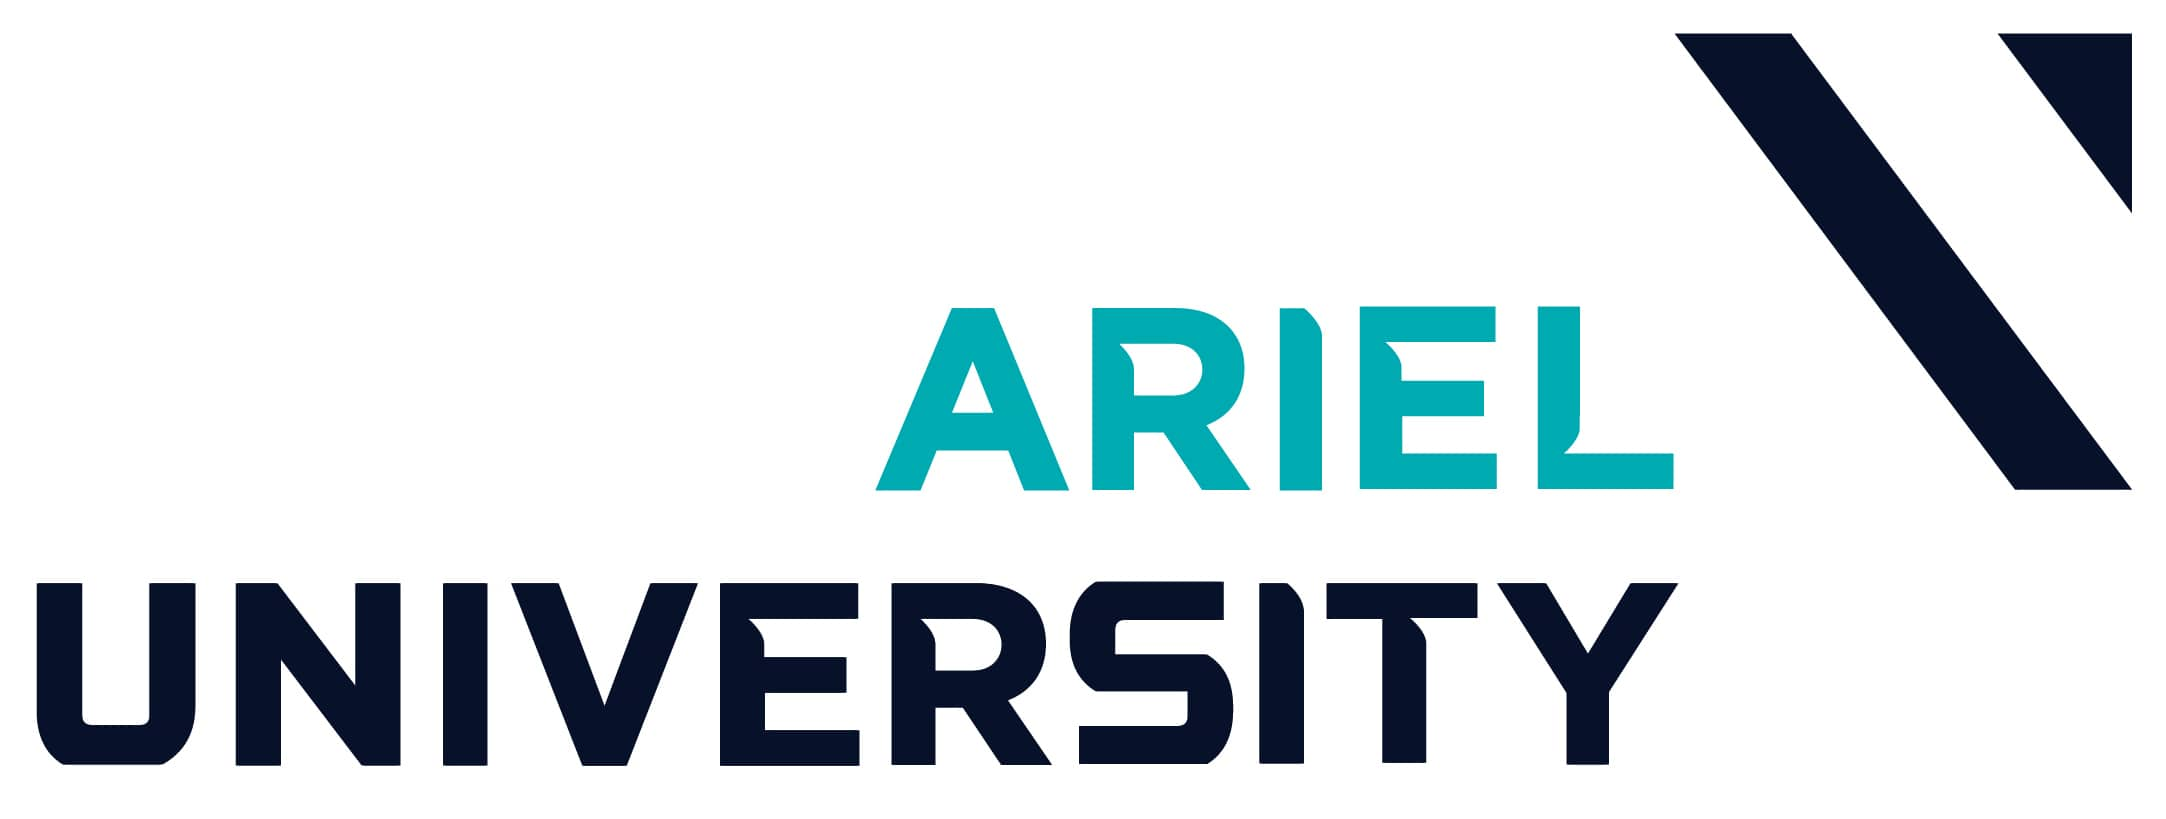

In [961]:
from IPython import display
display.Image("https://www.ariel.ac.il/sites/Navon-Venezia/img/Ariel_U_logo2.jpg")

# Final Project Data Analysis - Spotify Top 200 Charts (2020-2021)

___________________________________________________________________________________________________________

#### Presented by:


* Odeya Hazani
* Noa Amram 
* Roni Epstein
* Inbal Rosenblum

___________________________________________________________________________________________________________

#### Date of presentation:

07/06/2022

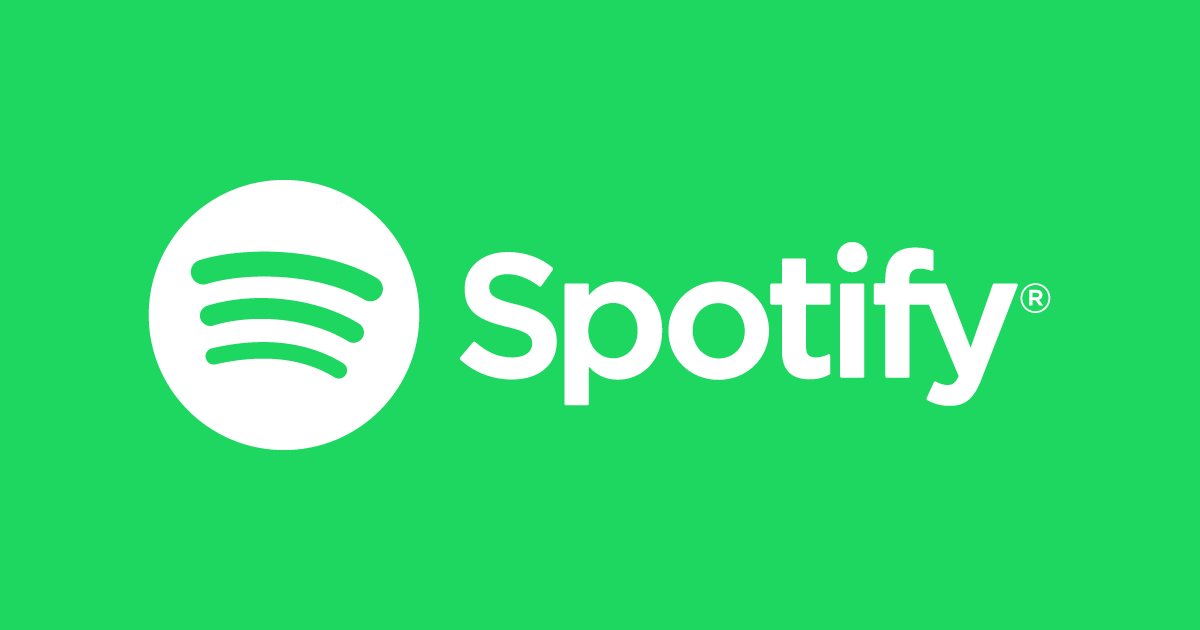

In [962]:
display.Image("https://files.geektime.co.il/wp-content/uploads/2018/03/open-graph-default-1520319482.png")

___________________________________________________________________________________________________________

# Source: 
kaggle:"https://www.kaggle.com/datasets/sashankpillai/spotify-top-200-charts-20202021"

___________________________________________________________________________________________________________

1. Introduction
2. INSIGHT 1- Duration of songs over the years
3. INSIGHT 2- Release years
4. INSIGHT 3- Genres
5. INSIGHT 4- Streams vs followers
6. INSIGHT 5- Predict- Regression Model

## 1. Introduction

In [963]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import sklearn as sk 
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [964]:
url = 'https://raw.githubusercontent.com/odeyahazani/spotify-data/main/spotify_dataset.csv'
spotify_df = pd.read_csv(url)
spotify_df.tail()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
1551,1552,195,1,2019-12-27--2020-01-03,New Rules,"4,630,675",Dua Lipa,27167675,2ekn2ttSfGqwhhate0LSR0,"['dance pop', 'pop', 'uk pop']",...,0.762,0.7,-6.021,0.0694,0.00261,0.153,116.073,209320,0.608,A
1552,1553,196,1,2019-12-27--2020-01-03,Cheirosa - Ao Vivo,"4,623,030",Jorge & Mateus,15019109,2PWjKmjyTZeDpmOUa3a5da,"['sertanejo', 'sertanejo universitario']",...,0.528,0.87,-3.123,0.0851,0.24,0.333,152.37,181930,0.714,B
1553,1554,197,1,2019-12-27--2020-01-03,Havana (feat. Young Thug),"4,620,876",Camila Cabello,22698747,1rfofaqEpACxVEHIZBJe6W,"['dance pop', 'electropop', 'pop', 'post-teen ...",...,0.765,0.523,-4.333,0.03,0.184,0.132,104.988,217307,0.394,D
1554,1555,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,"4,607,385","Dadá Boladão, Tati Zaqui, OIK",208630,5F8ffc8KWKNawllr5WsW0r,"['brega funk', 'funk carioca']",...,0.832,0.55,-7.026,0.0587,0.249,0.182,154.064,152784,0.881,F
1555,1556,199,1,2019-12-27--2020-01-03,Lover (Remix) [feat. Shawn Mendes],"4,595,450",Taylor Swift,42227614,3i9UVldZOE0aD0JnyfAZZ0,"['pop', 'post-teen pop']",...,0.448,0.603,-7.176,0.064,0.433,0.0862,205.272,221307,0.422,G


In [965]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      1556 non-null   int64 
 1   Highest Charting Position  1556 non-null   int64 
 2   Number of Times Charted    1556 non-null   int64 
 3   Week of Highest Charting   1556 non-null   object
 4   Song Name                  1556 non-null   object
 5   Streams                    1556 non-null   object
 6   Artist                     1556 non-null   object
 7   Artist Followers           1556 non-null   object
 8   Song ID                    1556 non-null   object
 9   Genre                      1556 non-null   object
 10  Release Date               1556 non-null   object
 11  Weeks Charted              1556 non-null   object
 12  Popularity                 1556 non-null   object
 13  Danceability               1556 non-null   object
 14  Energy  

In [966]:
spotify_df.isnull().sum()

Index                        0
Highest Charting Position    0
Number of Times Charted      0
Week of Highest Charting     0
Song Name                    0
Streams                      0
Artist                       0
Artist Followers             0
Song ID                      0
Genre                        0
Release Date                 0
Weeks Charted                0
Popularity                   0
Danceability                 0
Energy                       0
Loudness                     0
Speechiness                  0
Acousticness                 0
Liveness                     0
Tempo                        0
Duration (ms)                0
Valence                      0
Chord                        0
dtype: int64

Indeed there aren't Nans, but there were missing values that were addressed later according to a specific need.

### fixing the data

In [967]:
spotify_df= spotify_df.replace({'Artist Followers':" ",'Popularity':" ",'Danceability':" ",'Energy':" ",'Loudness':" ",'Speechiness':" ",'Acousticness':" ",'Liveness':" ",'Tempo':" ",'Valence':" ","Duration (ms)":" "},'0').copy()
spotify_df['Streams'] = spotify_df['Streams'].str.replace(",","").copy()


In [968]:
spotify_df['Streams'] = spotify_df['Streams'].astype('int64')
spotify_df['Artist Followers'] = spotify_df['Artist Followers'].astype('int64')
spotify_df['Popularity'] = spotify_df['Popularity'].astype('float64')
spotify_df['Danceability'] = spotify_df['Danceability'].astype('float64')
spotify_df['Energy'] = spotify_df['Energy'].astype('float64')
spotify_df['Loudness'] = spotify_df['Loudness'].astype('float64')
spotify_df['Speechiness'] = spotify_df['Speechiness'].astype('float64')
spotify_df['Acousticness'] = spotify_df['Acousticness'].astype('float64')
spotify_df['Liveness'] = spotify_df['Liveness'].astype('float64')
spotify_df['Tempo'] = spotify_df['Tempo'].astype('float64')
spotify_df['Duration (ms)'] = spotify_df['Duration (ms)'].astype('float64')
spotify_df['Valence'] = spotify_df['Valence'].astype('float64')

In [969]:

spotify_df['Duration (ms)'] = spotify_df['Duration (ms)'].replace(" ",spotify_df['Duration (ms)'].mean()).copy()

In [970]:
spotify_df["Release Date"]=spotify_df["Release Date"].replace(" ", "01-01-2000")

In [971]:
spotify_df["Release Date"]=spotify_df["Release Date"].replace("1957-09", "01-09-1957").copy()

In [972]:
spotify_df["Release Date"]=spotify_df["Release Date"].replace({"2014": "01-01-2014", "1995": "01-01-1995", "2015": "01-01-1995", "1963": "01-01-1963", "1962": "01-01-1962", "2002": "01-01-2002", "1990": "01-01-1990", "1981": "01-01-1981", "1964": "01-01-1964", "2012": "01-01-2012", "2016": "01-01-2016", "1994": "01-01-1994"}).copy()

We looked for different correlations, and they all came out surprisingly low.

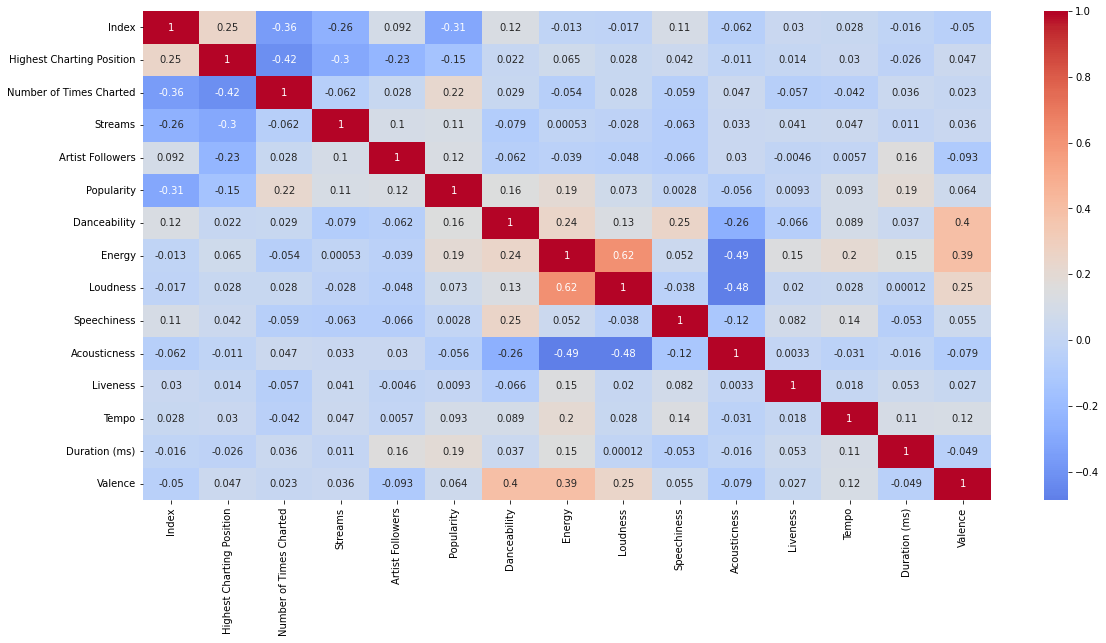

In [973]:
plt.figure(figsize=(19,9))  #figure size

sns.heatmap(spotify_df.corr(), cmap='coolwarm', center=0.1555, annot = True);

# 2. insight 1- Duration of songs over the years

In [974]:
spotify_df["Release year"]=pd.DatetimeIndex(spotify_df["Release Date"]).year

In [975]:
spotify_df["Duration (m)"]= spotify_df["Duration (ms)"].apply(lambda x: x/60000)

In [976]:
spotify_df['Release_year_int'] = spotify_df['Release year'].astype('int64').copy()
filter_data= spotify_df[spotify_df['Release_year_int']>=1990 ]


<AxesSubplot:>

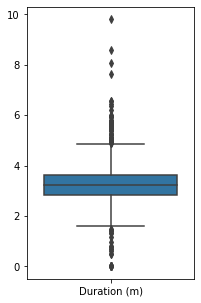

In [977]:
plt.figure(figsize=(3,5))
sns.boxplot(data = filter_data[['Duration (m)' ]])

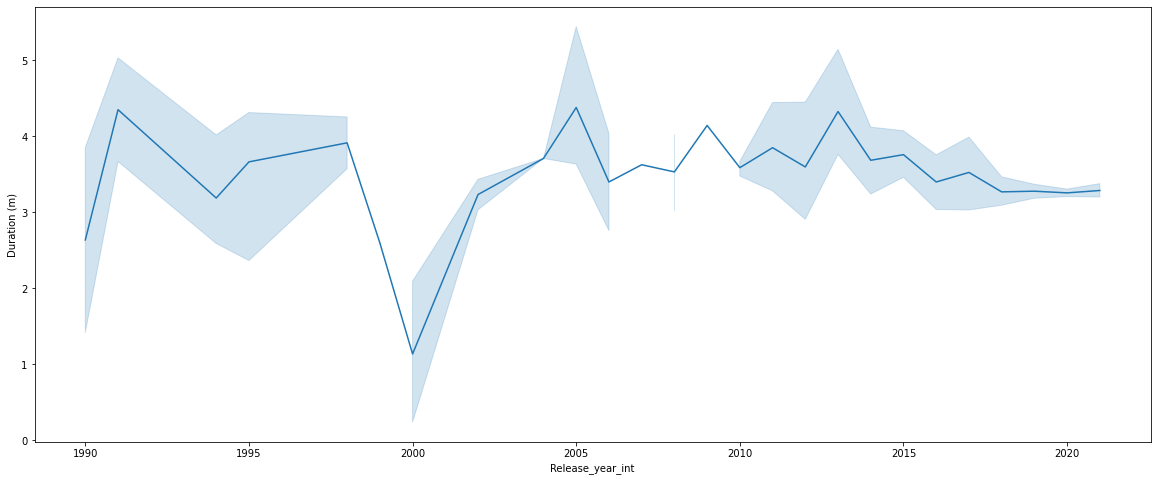

In [978]:
spotify_df['Release_year_int'] = spotify_df['Release year'].astype('int64').copy()
plt.figure(figsize=(20,8))
ax=sns.lineplot(data = filter_data, x ='Release_year_int', y = 'Duration (m)')


___________________________________________________________________________________________________________

#### we can see the stabilization in the songs Duration over the years.

___________________________________________________________________________________________________________

## 3. insight 2- Release years


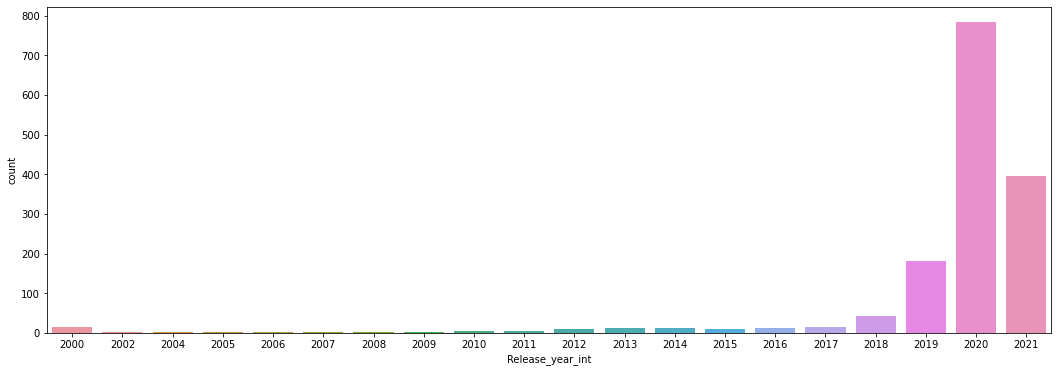

In [979]:
filter_data_year= spotify_df[spotify_df['Release_year_int']>=2000]
plt.figure(figsize = (18,6))
sns.countplot(data =filter_data_year, x ='Release_year_int');

#### pie- Release year

In [980]:
spotify_df["Release year"].min()

1942

In [981]:
spotify_df_Release_year = spotify_df[['Song Name','Release year']].copy()
spotify_df_Release_year['Release year'] = spotify_df_Release_year['Release year'].astype('int') 
years_out_of_range = spotify_df_Release_year['Release year'].unique()
years_out_of_range = years_out_of_range[years_out_of_range<=2019]

In [982]:
spotify_df_Release_year_2019 =spotify_df_Release_year.replace(years_out_of_range,'2019-1942')

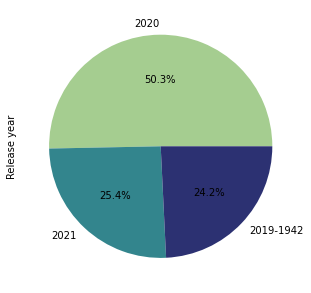

In [983]:
plt.figure(figsize = (5,12))
spotify_df_Release_year_2019['Release year'].value_counts().plot.pie(autopct="%1.1f%%",cmap ='crest');
spotify_df_Release_year_2019['Release year'] = spotify_df_Release_year_2019['Release year'].astype('object') 

___________________________________________________________________________________________________________

We can see that majority of the songs that published in spotify and was very successful, published in year 2020. we can anderstand that new songs will be very successful and will have many streams in the app.

___________________________________________________________________________________________________________

## 4. insight 3- Genres

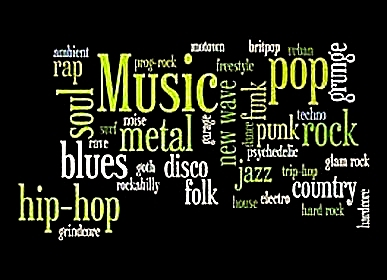

In [984]:
display.Image("https://spiritmusicmeetups.org/wp-content/uploads/2021/02/Music-Genres-2.jpg")

In [985]:
spotify_df[['Genre']]

,Genre
0,"['indie rock italiano', 'italian pop']"
1,['australian hip hop']
2,['pop']
3,"['pop', 'uk pop']"
4,"['lgbtq+ hip hop', 'pop rap']"
...,...
1551,"['dance pop', 'pop', 'uk pop']"
1552,"['sertanejo', 'sertanejo universitario']"
1553,"['dance pop', 'electropop', 'pop', 'post-teen ..."
1554,"['brega funk', 'funk carioca']"


In [986]:
spotify_df['Genre'] =  spotify_df['Genre'].str.replace("]", "",regex = True).copy()
spotify_df['Genre'] =  spotify_df['Genre'].str.replace("[", "",regex = True ).copy()
spotify_df['Genre'] =  spotify_df['Genre'].str.replace("[", "",regex = True ).copy()
spotify_df['Genre'] =  spotify_df['Genre'].str.replace("'", "",regex = True ).copy()
spotify_df['Genre'] =  spotify_df['Genre'].str.replace(", ", ",",regex = True ).copy()
sort_streams=spotify_df.sort_values(by=['Streams'],ascending=False)
spotify_df['Genre'][:50]

0                       indie rock italiano,italian pop
1                                    australian hip hop
2                                                   pop
3                                            pop,uk pop
4                                lgbtq+ hip hop,pop rap
5                                lgbtq+ hip hop,pop rap
6                                         dance pop,pop
7                          puerto rican pop,trap latino
8                           latin,reggaeton,trap latino
9                       indie rock italiano,italian pop
10                                 dance pop,pop,uk pop
11                 latin,reggaeton,reggaeton colombiano
12                                k-pop,k-pop boy group
13                       canadian pop,pop,post-teen pop
14                                k-pop,k-pop boy group
15                                                  pop
16                                                  pop
17           canadian contemporary r&b,canadian 

In [987]:
spotify_df_Genre_split = spotify_df['Genre'].str.split(",",expand = True).copy()

In [988]:
spotify_df_Genre_split_np = spotify_df_Genre_split.to_numpy()
spotify_df_Genre_split_np

array([['indie rock italiano', 'italian pop', None, ..., None, None,
        None],
       ['australian hip hop', None, None, ..., None, None, None],
       ['pop', None, None, ..., None, None, None],
       ...,
       ['dance pop', 'electropop', 'pop', ..., None, None, None],
       ['brega funk', 'funk carioca', None, ..., None, None, None],
       ['pop', 'post-teen pop', None, ..., None, None, None]],
      dtype=object)

In [989]:
all_Genre_np = [ ]
for row in range(len(spotify_df_Genre_split_np)):
                 x = spotify_df_Genre_split_np[row]
                 all_Genre_np = np.append(all_Genre_np,x)


In [990]:
all_Genre_np = np.delete(all_Genre_np,all_Genre_np == None)
all_Genre_np = np.delete(all_Genre_np,all_Genre_np == ' None')
all_Genre_np = np.delete(all_Genre_np,all_Genre_np == ' ')
all_Genre_np = np.delete(all_Genre_np,all_Genre_np == '')


In [991]:
from collections import Counter
Counter(all_Genre_np).most_common(10)

[('pop', 485),
 ('rap', 310),
 ('dance pop', 257),
 ('post-teen pop', 256),
 ('pop rap', 164),
 ('trap', 159),
 ('reggaeton', 157),
 ('trap latino', 155),
 ('latin', 154),
 ('hip hop', 151)]

In [992]:
most_common_10_Genres = pd.DataFrame({'Genre':['pop','rap','dance pop','post-teen pop','pop rap','trap','reggaeton','trap latino','latin','hip hop'],
                             'Number of times in spotify_df': [485,310,257,256,164,159,157,155,154,151]})

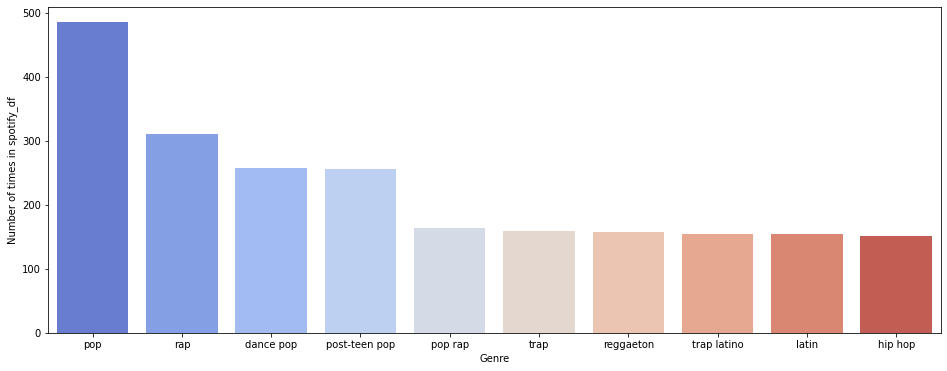

In [993]:
plt.figure(figsize=(16,6))
sns.barplot(data = most_common_10_Genres, x = 'Genre', y ='Number of times in spotify_df', palette = "coolwarm");

In [994]:
top_10_streamed_Genre = spotify_df[['Genre']].head(50).copy()
top_10_streamed_Genre_split =  top_10_streamed_Genre['Genre'].str.split(",",expand = True).copy()

In [995]:
top_10_streamed_Genre_np = top_10_streamed_Genre_split.to_numpy()

In [996]:
all_Genre_top_10_streamed_np  = [ ]
for row in range(len(top_10_streamed_Genre_np)):
                 x = top_10_streamed_Genre_np[row]
                 all_Genre_top_10_streamed_np = np.append(all_Genre_top_10_streamed_np,x)

In [997]:
all_Genre_top_10_streamed_np = np.delete(all_Genre_top_10_streamed_np,all_Genre_top_10_streamed_np == None)

In [998]:
from collections import Counter
Counter(all_Genre_top_10_streamed_np).most_common(10)

[('pop', 20),
 ('dance pop', 10),
 ('reggaeton', 10),
 ('latin', 9),
 ('trap latino', 8),
 ('post-teen pop', 4),
 ('reggaeton colombiano', 3),
 ('k-pop', 3),
 ('k-pop boy group', 3),
 ('canadian pop', 3)]

In [999]:
Top_10_Genres_streamed = pd.DataFrame({'Genre':['pop','reggaeton','dance pop','latin','trap latino','post-teen pop','reggaeton colombiano','k-pop','k-pop boy group','canadian pop'],
                             'Number of times in spotify_df': [20,10,10,9,8,4,3,3,3,3]}) 

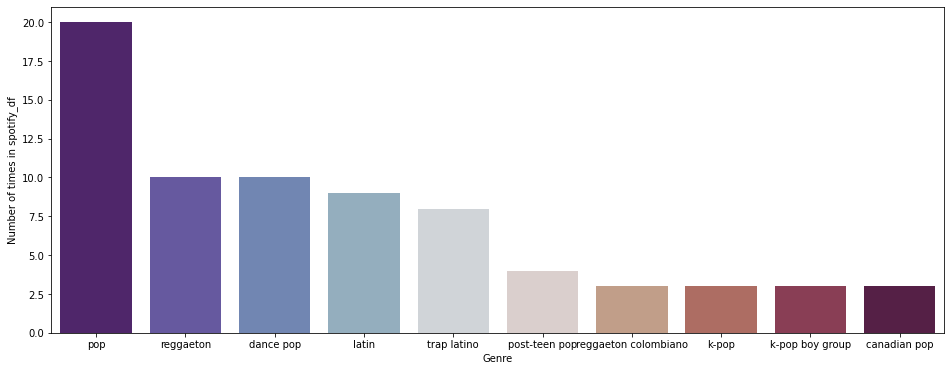

In [1000]:
plt.figure(figsize=(16,6))
sns.barplot(data = Top_10_Genres_streamed, x = 'Genre', y ='Number of times in spotify_df',palette = "twilight_shifted");

In [1001]:
Summary =pd.DataFrame({'Top_10_Genres':['pop','rap','dance pop','post-teen pop','pop rap','trap','reggaeton','trap latino','latin','hip hop'] ,
                       'Top_10_streamed':['pop','reggaeton','dance pop','latin','trap latino','post-teen pop','reggaeton colombiano','k-pop','k-pop boy group','canadian pop']})
Summary

,Top_10_Genres,Top_10_streamed
0,pop,pop
1,rap,reggaeton
2,dance pop,dance pop
3,post-teen pop,latin
4,pop rap,trap latino
5,trap,post-teen pop
6,reggaeton,reggaeton colombiano
7,trap latino,k-pop
8,latin,k-pop boy group
9,hip hop,canadian pop


___________________________________________________________________________________________________________

##### we can see the diffrence between the most common geners and the geners of the most popular songs.

___________________________________________________________________________________________________________

## 5. insight 4- streams vs followers

#### The artists of the top 10 heard songs - The top 10 artists with the most followers

In [1002]:
spotify_df_Artist_split = spotify_df['Artist'].str.split(",",expand = True).copy()
spotify_df['Artist']=spotify_df_Artist_split[0]
sort_streams=spotify_df.sort_values(by=['Streams'],ascending=False)

In [1003]:
sort_Artist_Followers =spotify_df.groupby('Artist')[['Artist Followers']].first()
sort_Artist_Followers = sort_Artist_Followers.sort_values(by=['Artist Followers'] ,ascending=False).reset_index()

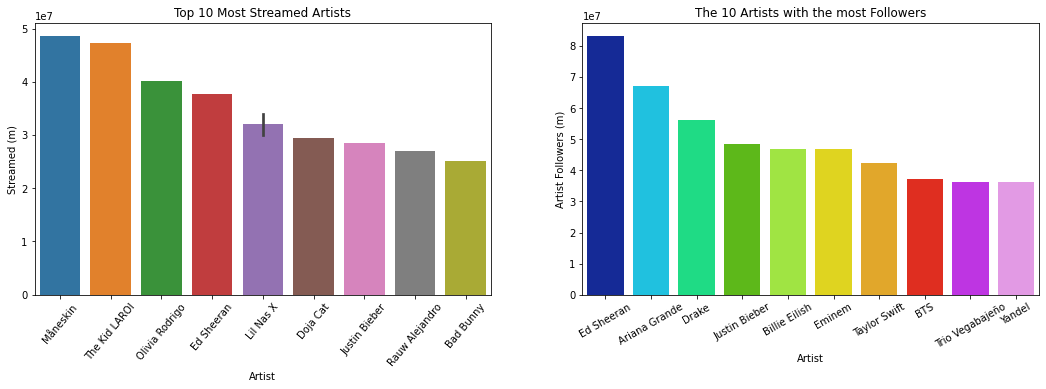

In [1004]:
fig, ax = plt.subplots(1,2, figsize = (18,5))
ax0 = sns.barplot(x='Artist',y='Streams',data=sort_streams.head(10),ax = ax[0])
ax0.set_title("Top 10 Most Streamed Artists")
ax0.tick_params(axis = 'x',rotation = 50)
ax0.set_ylabel('Streamed (m)')
ax1 = sns.barplot(x='Artist',y='Artist Followers',data=sort_Artist_Followers.head(10),palette = "gist_ncar",ax = ax[1])
ax1.set_title("The 10 Artists with the most Followers")##########
ax1.set_ylabel('Artist Followers (m)')
ax1.tick_params(axis = 'x',rotation = 30)
plt.show()

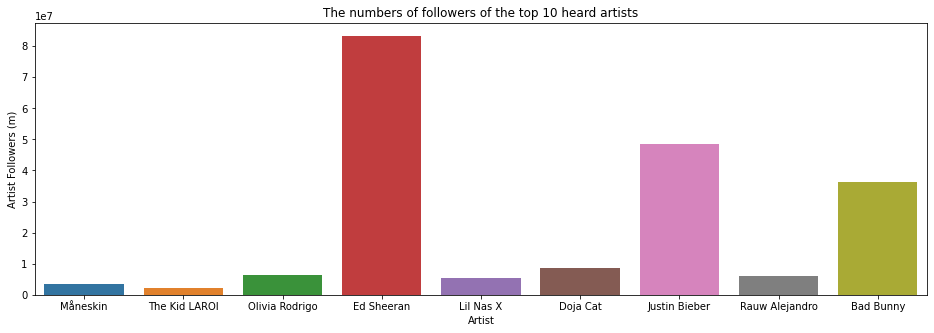

In [1005]:
plt.figure(figsize=(16,5))
ax = sns.barplot(x='Artist',y='Artist Followers',data=sort_streams.head(10));
ax.set_title("The numbers of followers of the top 10 heard artists")
ax.set_ylabel('Artist Followers (m)')
ax;

___________________________________________________________________________________________________________

we can see that although we thought the artists of the most played songs would also be the artists with the largest number of followers, we saw that these weren't the results.
The main explanation for this is that some of the most heard songs are songs by artists who have broken out following this song lately, and they aren't yet as famous as veteran and popular artists.


___________________________________________________________________________________________________________

## 6. insight 5- predict- Regression Model

In [1006]:
spotify_features = ['Artist Followers', 'Energy', 'Number of Times Charted', 'Popularity', "Highest Charting Position", "Danceability"] # these columns will be used to conclude about the features
X = spotify_df[spotify_features] 
y = spotify_df['Streams'] 

In [1007]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, random_state=42) 

In [1008]:
spotify_model = DecisionTreeRegressor(random_state=4)
spotify_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=4)

In [1009]:
print("Making predictions for the following 5 songs:")
print(y_test.head())

print("The predictions are")
test_pred = spotify_model.predict(X_test.head())
print(test_pred)

Making predictions for the following 5 songs:
1496    8329349
168     5386268
353     5174437
468     5510113
1410    7142364
Name: Streams, dtype: int64
The predictions are
[7112419. 5145099. 4752181. 5054319. 7292247.]


In [1010]:
print("Making predictions all test songs:")
print(y_test)

print("The predictions are")
test_pred = spotify_model.predict(X_test)
print(test_pred)
print("MSE: {:.3f}".format( mean_squared_error(y_test.values, test_pred , squared=False ) ))
pred=spotify_model.predict(X_test)
print(("PER:") , (np.abs(pred-y_test.values.ravel())/y_test.values.ravel()).mean())

Making predictions all test songs:
1496    8329349
168     5386268
353     5174437
468     5510113
1410    7142364
         ...   
1523    5085706
58      9048966
1521    5199618
1034    5104422
1201    8304928
Name: Streams, Length: 312, dtype: int64
The predictions are
[ 7112419.  5145099.  4752181.  5054319.  7292247.  5141212. 10032746.
  4916860.  6988886.  5463964. 14329162.  7514854.  5446609.  5116325.
  5044252.  6083338.  4362442.  4633237.  7170169.  5936752.  4652583.
  6255954.  5254969. 10609206.  5238547.  5124606. 11373347.  9428494.
  7917707.  5134161.  5547002.  8564775.  5394197.  5848466.  5421905.
  5043665.  6255954.  7347891.  4633237.  4821213.  5436286.  6317487.
  4679948.  4383521. 15967986.  4665053.  5198514.  7821869.  5041120.
  4535580.  9399230.  5113574.  5226264.  7465445.  7053947.  6161664.
  4761908.  4787127.  9159901.  5198514. 10016907.  5454994.  5690260.
  7451452.  5290730. 11683383.  8312399.  5166847.  6268542.  6693229.
  4514763.  468760

In [1011]:
def eval(x_test,y_test,model):
    pred = model.predict(x_test)
    print("MSE: {:.3f}".format(mean_squared_error(pred,y_test,squared=False)))

In [1012]:
df = pd.DataFrame(columns = ['Streams', 'Predictions'])

In [1013]:
df['Streams'] = y_test
df = df.reset_index(drop=True)

In [1014]:
df['Predictions'] = pd.Series(test_pred)
df['Predictions'] = df['Predictions'].astype('int64')
df.head(20)

,Streams,Predictions
0,8329349,7112419
1,5386268,5145099
2,5174437,4752181
3,5510113,5054319
4,7142364,7292247
5,5656775,5141212
6,9017356,10032746
7,4992396,4916860
8,7932101,6988886
9,5174298,5463964


In [1015]:
print("MSE: {:.3f}".format( mean_squared_error(y_test.values, test_pred , squared=False ) ))
pred=spotify_model.predict(X_test)
print(("PER:") , (np.abs(pred-y_test.values.ravel())/y_test.values.ravel()).mean())


MSE: 1954372.097
PER: 0.12293041601922343


___________________________________________________________________________________________________________

we found that the error percentage of the model is 12.3%, and so the accuarcy is 87.7%.

___________________________________________________________________________________________________________

### The Regression Tree

In [1016]:
def plot_tree(tree_model,feat,size=(15,10)):
    fig = plt.figure(figsize=size)
    tree.plot_tree(tree_model, 
                   feature_names = spotify_features, 
                   filled=True,
                  fontsize=15)  
    plt.show()

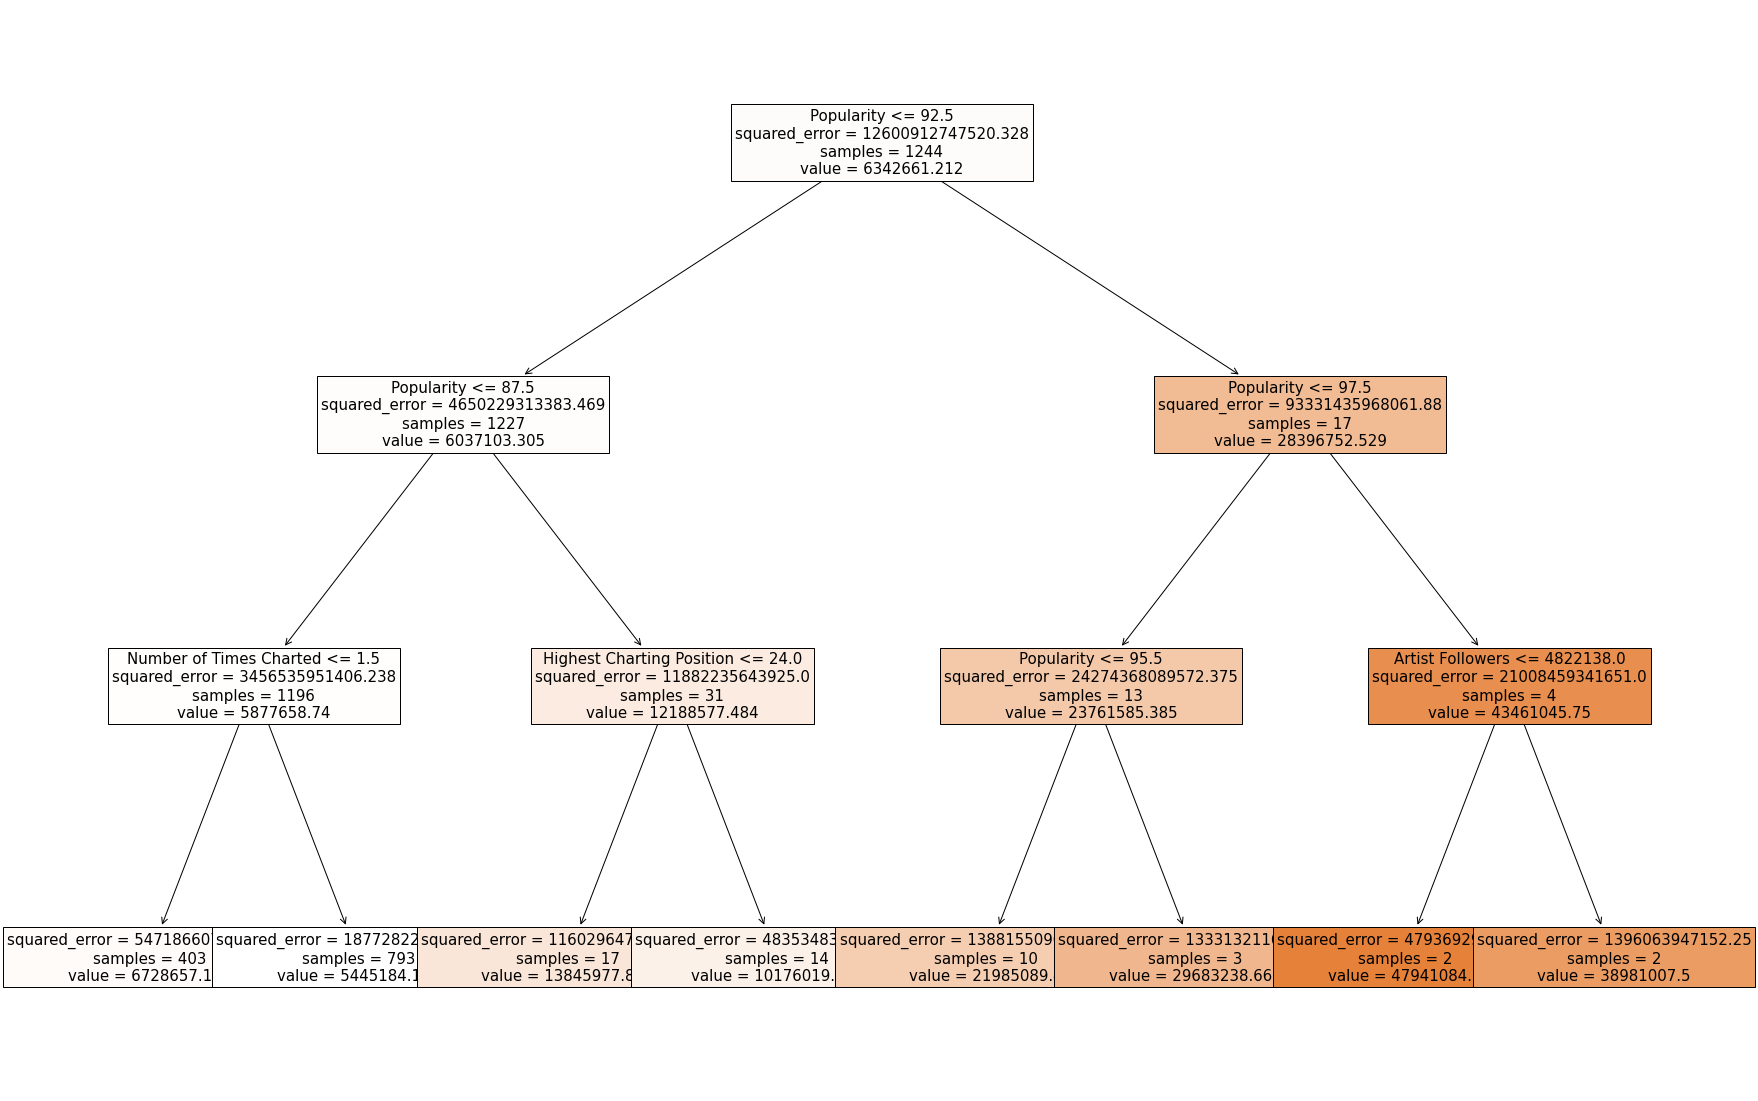

In [1017]:
spotify_model = DecisionTreeRegressor(max_depth=3,random_state=42)
spotify_model.fit(X_train,y_train)

plot_tree(spotify_model,X_test.columns,size=(30,20))